# Topic Modeling
## TBA Assignment 
## Tweets - airlines dataset

### This is US airlines data which contain comments of passengers on basis of service provided by airlines.

## import libraries and load dataset

In [1]:

# Loading data set using pandas.
import pandas as pd

file= "C:/Users/shakkerar/Downloads/Tweets.csv"
df = pd.read_csv(file)
df.head(10)

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   
5  570300767074181121          negative                        1.0000   
6  570300616901320704          positive                        0.6745   
7  570300248553349120           neutral                        0.6340   
8  570299953286942721          positive                        0.6559   
9  570295459631263746          positive                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   
5     Can't Tell                     0.6842  Virgin America   
6            NaN                     0.0000  Virgin America   
7            NaN                        NaN  Virgin America   
8            NaN                        NaN  Virgin America   
9            NaN                        NaN  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   
5                    NaN    jnardino                 NaN              0   
6                    NaN  cjmcginnis                 NaN              0   
7                    NaN       pilot                 NaN              0   
8                    NaN    dhepburn                 NaN              0   
9                    NaN  YupitsTate                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   
5  @VirginAmerica seriously would pay $30 a fligh...         NaN   
6  @VirginAmerica yes, nearly every time I fly VX...         NaN   
7  @VirginAmerica Really missed a prime opportuni...         NaN   
8    @virginamerica Well, I didn't…but NOW I DO! :-D         NaN   
9  @VirginAmerica it was amazing, and arrived an ...         NaN   

               tweet_created    tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800               NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800               NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800         Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800               NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800               NaN  Pacific Time (US & Canada)  
5  2015-02-24 11:14:33 -0800               NaN  Pacific Time (US & Canada)  
6  2015-02-24 11:13:57 -0800  San Francisco CA  Pacific Time (US & Canada)  
7  2015-02-24 11:12:29 -0800       Los Angeles  Pacific Time (US & Canada)  
8  2015-02-24 11:11:19 -0800         San Diego  Pacific Time (US & Canada)  
9  2015-02-24 10:53:27 -0800       Los Angeles  Eastern Time (US & Canada)

## couple of texts

In [2]:
print(repr(df.iloc[2666]["text"][0:400]))
print(repr(df.iloc[4726]["text"][0:400]))

'@united Looking forward to flying with you guys as well !!'
'@SouthwestAir we checked in right at 24hr mark. Boarding C group with kids ages 6&amp;8 dnt want to be split. What sld we do?'


## We will split speech into sentences

In [4]:
import re
df["paragraphs"] = df["text"].map(lambda text: re.split(r'\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

## Start by getting TFIDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stopwords

tfidf_text_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
tfidf_text_vectors.shape


(14640, 2818)

## Make a data frame of sentences

In [8]:
paragraph_df = pd.DataFrame([
    {"text": paragraph, "tweet_created": tweet_created}
    for paragraphs, tweet_created in zip(df["paragraphs"], df["tweet_created"])
    for paragraph in paragraphs if paragraph
])
paragraph_df.head(10)


text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   
5  @VirginAmerica seriously would pay $30 a fligh...   
6     it's really the only bad thing about flying VA   
7  @VirginAmerica yes, nearly every time I fly VX...   
8  @VirginAmerica Really missed a prime opportuni...   
9    @virginamerica Well, I didn't…but NOW I DO! :-D   

               tweet_created  
0  2015-02-24 11:35:52 -0800  
1  2015-02-24 11:15:59 -0800  
2  2015-02-24 11:15:48 -0800  
3  2015-02-24 11:15:36 -0800  
4  2015-02-24 11:14:45 -0800  
5  2015-02-24 11:14:33 -0800  
6  2015-02-24 11:14:33 -0800  
7  2015-02-24 11:13:57 -0800  
8  2015-02-24 11:12:29 -0800  
9  2015-02-24 11:11:19 -0800

## Get the TFIDF of the sentences DF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert spaCy stopwords to a list
stopwords_list = list(stopwords)

# Create the TfidfVectorizer
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])

# Display the shape of the resulting TF-IDF matrix
tfidf_para_vectors.shape


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(14686, 2819)

## topic modeling

# NMF

In [11]:
from sklearn.decomposition import NMF
nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

## Let’s look at our 10 topics:

In [13]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Assuming you have already defined nmf_text_model and tfidf_text_vectorizer
feature_names = tfidf_text_vectorizer.get_feature_names_out()
display_topics(nmf_text_model, feature_names)



Topic 00
 flight (11.73)
 cancelled (5.81)
 flightled (3.83)
 late (1.77)
 delayed (1.73)

Topic 01
 jetblue (17.81)
 just (0.96)
 jfk (0.94)
 love (0.80)
 guys (0.76)

Topic 02
 united (11.67)
 just (0.95)
 bag (0.79)
 plane (0.74)
 dm (0.73)

Topic 03
 southwestair (14.72)
 dm (1.46)
 just (1.11)
 sent (0.95)
 help (0.87)

Topic 04
 thanks (47.77)
 great (2.61)
 virginamerica (2.00)
 got (1.90)
 awesome (1.58)

Topic 05
 thank (58.39)
 great (3.52)
 response (1.57)
 virginamerica (1.48)
 ok (1.48)

Topic 06
 usairways (10.49)
 hold (1.91)
 hours (1.31)
 help (1.19)
 hour (0.90)

Topic 07
 http (22.97)
 fleek (13.91)
 fleet (13.73)
 rt (5.29)
 virginamerica (2.34)

Topic 08
 service (14.83)
 customer (13.44)
 worst (2.40)
 great (1.60)
 terrible (1.53)

Topic 09
 americanair (13.63)
 help (1.30)
 aa (0.95)
 need (0.83)
 dm (0.71)


## Run same model

In [15]:
from sklearn.decomposition import NMF

# Assuming tfidf_para_vectors and tfidf_para_vectorizer are already defined
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())



Topic 00
 flight (13.03)
 late (2.56)
 delayed (2.44)
 time (0.99)
 virginamerica (0.96)

Topic 01
 co (18.63)
 http (18.42)
 fleek (6.38)
 fleet (6.35)
 rt (2.48)

Topic 02
 united (13.03)
 thanks (2.10)
 bag (0.84)
 dm (0.82)
 time (0.61)

Topic 03
 jetblue (19.87)
 thanks (3.50)
 fleek (1.43)
 fleet (1.31)
 jfk (0.94)

Topic 04
 southwestair (16.27)
 thanks (2.46)
 dm (1.61)
 sent (1.09)
 destinationdragons (0.85)

Topic 05
 americanair (16.23)
 thanks (5.98)
 aa (1.06)
 help (0.88)
 dfw (0.74)

Topic 06
 thank (57.14)
 great (3.07)
 virginamerica (1.39)
 response (1.36)
 ok (1.31)

Topic 07
 usairways (11.17)
 hold (1.83)
 hours (1.26)
 help (1.15)
 hour (0.83)

Topic 08
 service (14.02)
 customer (12.69)
 worst (2.29)
 great (1.45)
 terrible (1.45)

Topic 09
 cancelled (12.91)
 flightled (9.36)
 flights (4.64)
 flighted (3.45)
 help (2.71)


## How “BIG” is each topic?

In [16]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([ 8.66320584, 11.0071158 , 16.74611816, 11.54352505,  7.46224261,
        5.58691361, 15.45641895,  5.50226325,  7.56883122, 10.46336551])

## Topic sizes

In [17]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([ 7.48551681,  8.40448787, 15.64291817,  9.33290684, 11.71454998,
       13.12984241,  5.29749233, 14.43255779,  7.26461754,  7.29511026])

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape


(14686, 2819)

## Latent Dirichlet Allocation

### Start by cutting the paragraphs intowords:

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape



(14686, 2819)

## Run the LDA

In [23]:
from sklearn.decomposition import LatentDirichletAllocation
lda_para_model = LatentDirichletAllocation(n_components = 10,random_state=42)
W_lda_para_matrix =lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

In [25]:
def display_lda_topics(model, feature_names, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (feature_names[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Assuming you have already defined lda_para_model and count_para_vectorizer
feature_names_lda = count_para_vectorizer.get_feature_names_out()
display_lda_topics(lda_para_model, feature_names_lda)



Topic 00
 americanair (6.32)
 usairways (4.62)
 hours (1.69)
 flight (1.48)
 southwestair (1.38)

Topic 01
 united (8.33)
 flight (7.44)
 plane (3.94)
 gate (2.12)
 usairways (1.52)

Topic 02
 southwestair (10.92)
 usairways (2.11)
 dm (1.95)
 airline (1.73)
 best (1.63)

Topic 03
 flight (8.97)
 americanair (2.52)
 flights (2.48)
 jetblue (2.35)
 delayed (2.34)

Topic 04
 co (16.04)
 http (15.26)
 jetblue (9.81)
 fleek (2.01)
 fleet (2.01)

Topic 05
 thanks (5.60)
 jetblue (5.43)
 usairways (3.67)
 southwestair (3.09)
 guys (2.70)

Topic 06
 usairways (6.34)
 flight (4.04)
 hold (2.38)
 minutes (2.27)
 late (1.82)

Topic 07
 flight (5.81)
 cancelled (5.17)
 service (3.87)
 americanair (3.75)
 usairways (3.55)

Topic 08
 united (17.83)
 bag (1.84)
 thank (1.13)
 email (1.08)
 amp (0.95)

Topic 09
 americanair (3.98)
 united (3.90)
 jetblue (2.71)
 like (1.71)
 bag (1.42)


## Topic size

In [26]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 9.96895759, 10.56246143,  8.97369105, 10.09965287,  7.22448139,
       12.39871919,  9.02235491, 11.20502862, 11.19146465,  9.3531883 ])

## The amazing pyLDAvis!

In [28]:
!pip install pyldavis


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pyldavis from https://files.pythonhosted.org/packages/6b/5a/66364c6799f2362bfb9b7100bc1ce6ffcdfe7f17e8d2e85a591bfe427643/pyLDAvis-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for funcy from https://files.pythonhosted.org/packages/d5/08/c2409cb01d5368dcfedcbaffa7d044cc8957d57a9d0855244a5eb4709d30/funcy-2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/06/4d/8d2dd5d81afdea2aa790860d5c7e12f80154923ba827e3fa36759f0bf2cd/FuzzyTM-2.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/f0/fe/b899a3d9a18c9a44a35155c79a4c152cb85990ea38ce6ab7ed73e5caa1b9/pyFUME-0.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for simpful from https://files.pythonhosted.org/packages/9d/0e/aebc2fb0b0f481994179b2e

In [37]:
import pyLDAvis

# Assuming lda_para_model, count_para_vectors, and count_para_vectorizer are already defined

# Extract vocabulary and term frequencies from CountVectorizer
vocab = count_para_vectorizer.get_feature_names_out()
term_frequency = count_para_vectors.sum(axis=0).A1

# Get the topic-term distribution matrix from LDA model
topic_term_dists = lda_para_model.components_

# Get the document-topic distribution matrix from LDA model
doc_topic_dists = lda_para_model.transform(count_para_vectors)

# Get the document lengths
doc_lengths = count_para_vectors.sum(axis=1).A1

# Prepare the visualization
lda_display = pyLDAvis.prepare(
    topic_term_dists,
    doc_topic_dists,
    doc_lengths,
    vocab=vocab,
    term_frequency=term_frequency
)

# Display the visualization
pyLDAvis.display(lda_display)


## Let’s draw wordclouds for the 10topics

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1]  # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])

        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)

        plt.figure(figsize=(12, 12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")

        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

# Assuming you have already trained an NMF or LDA model and have the features (terms)
# Replace the following with your actual model and features
# wordcloud_topics(your_model, your_features)


C:\Users\shakkerar\AppData\Local\Temp\ipykernel_20156\88781572.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


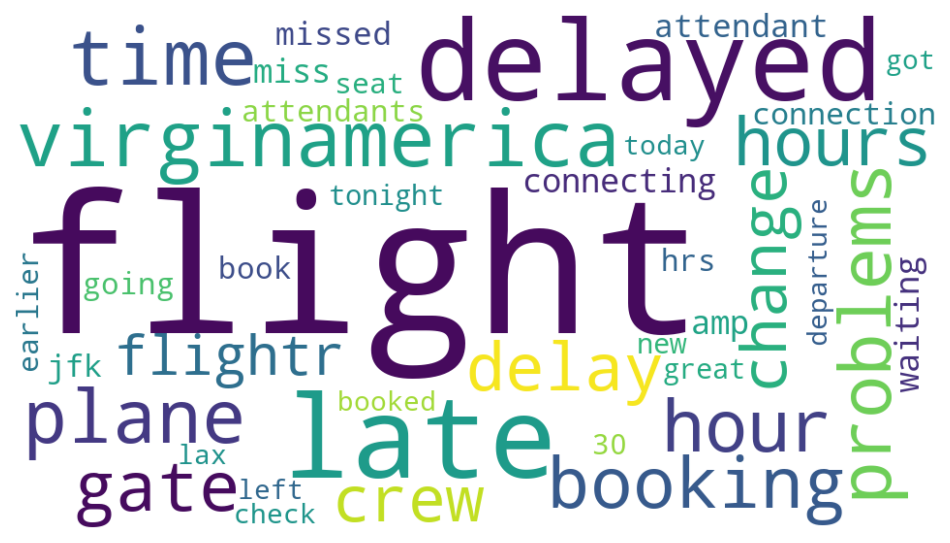

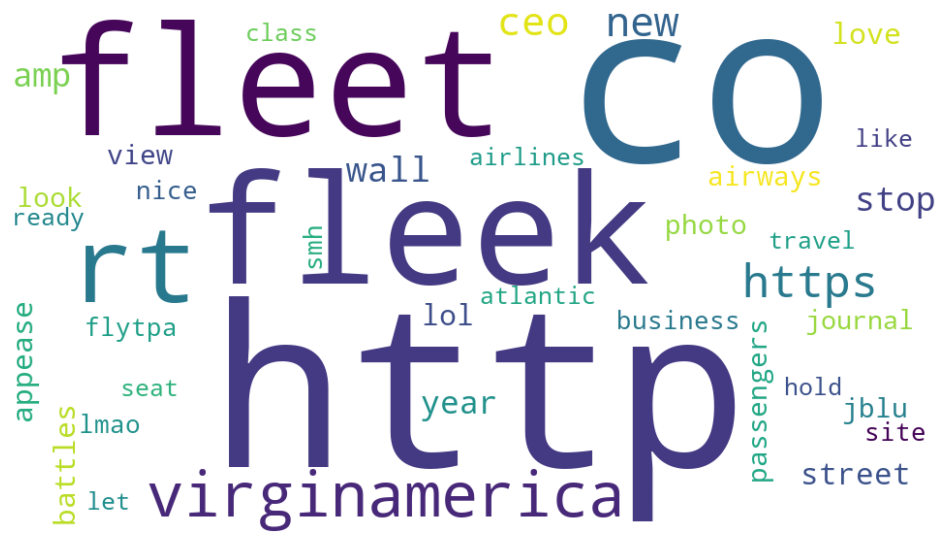

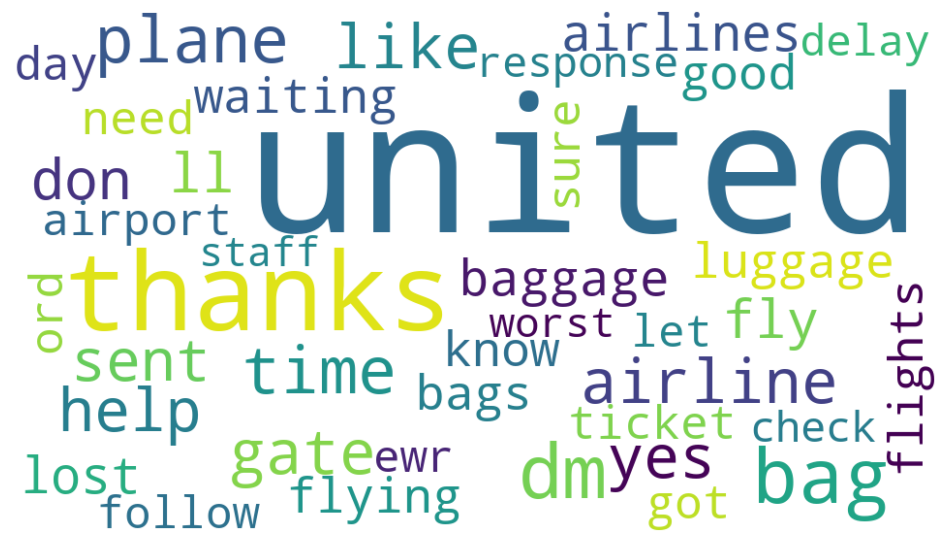

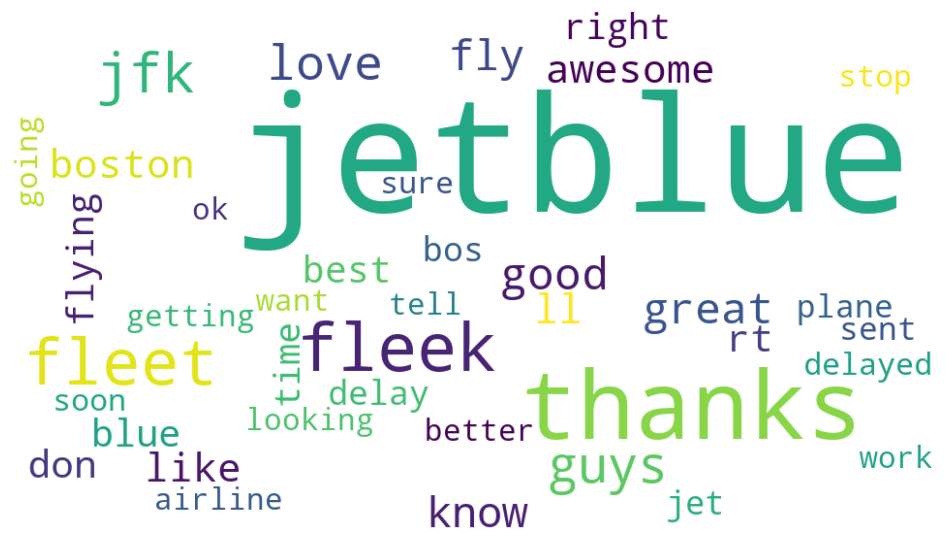

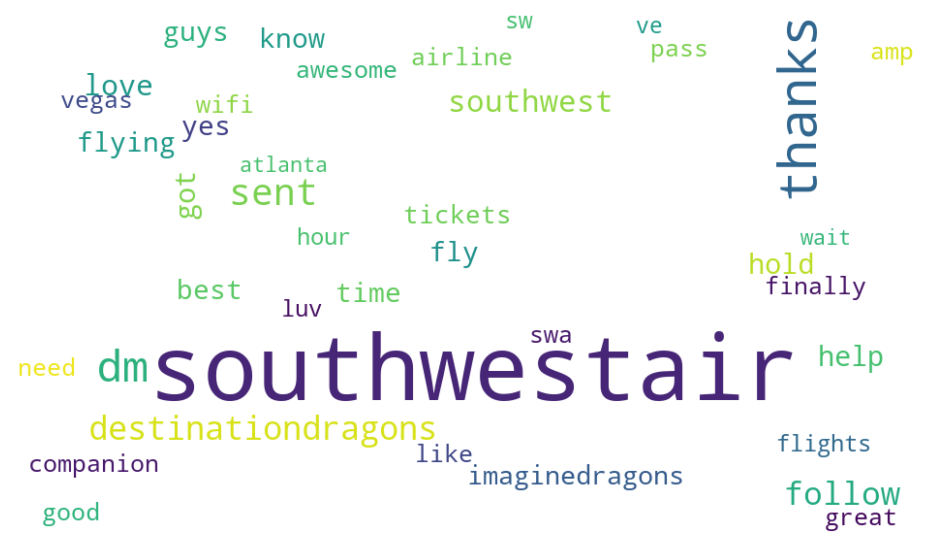

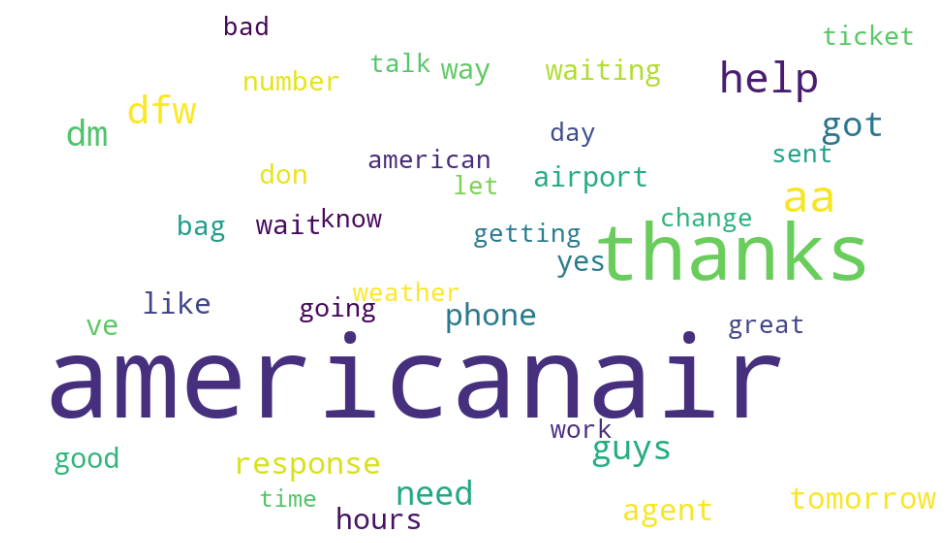

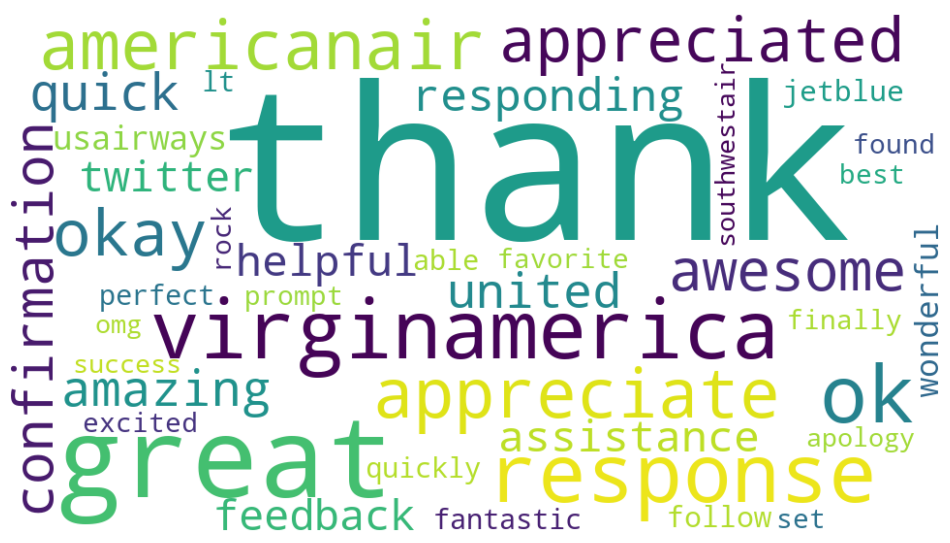

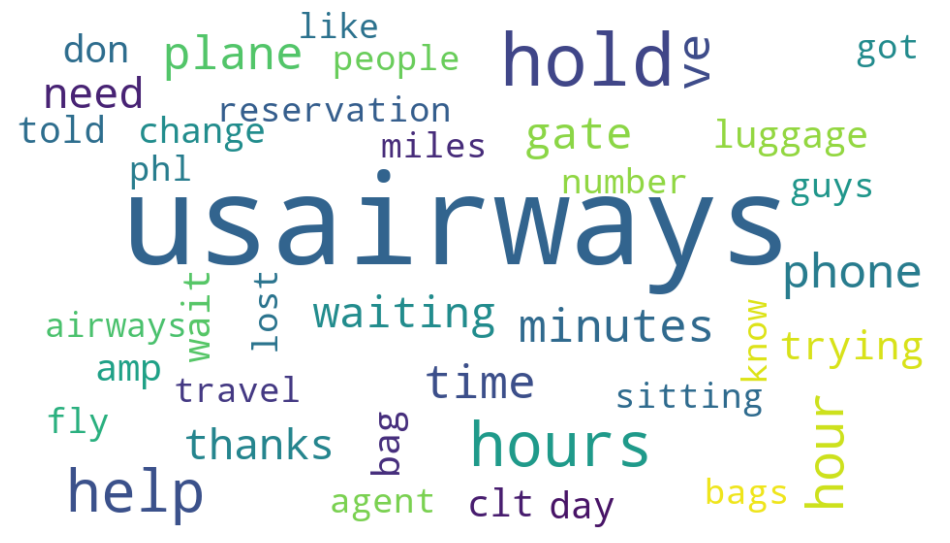

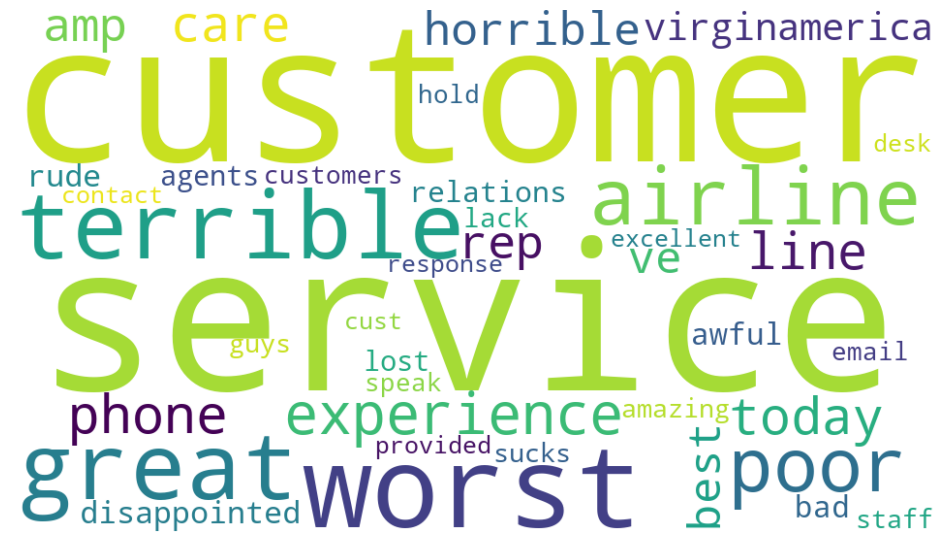

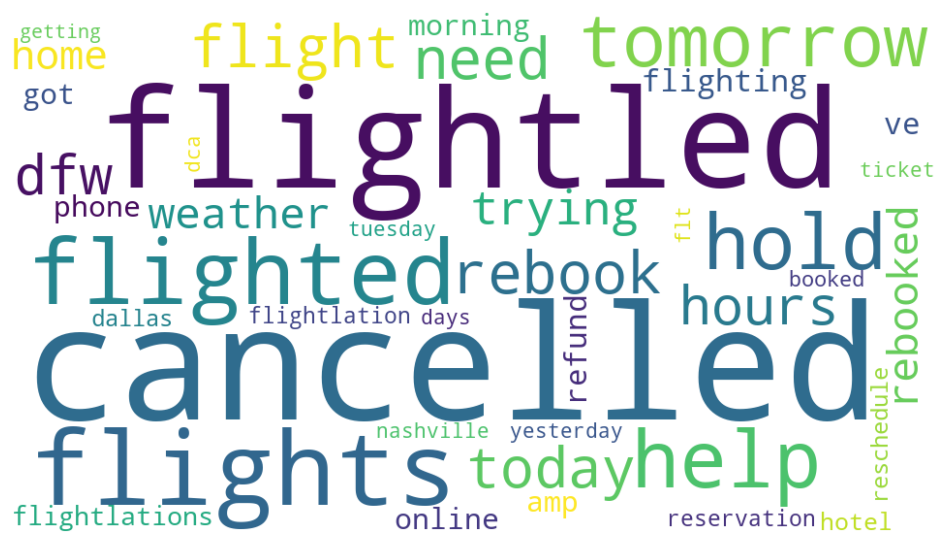

In [41]:
wordcloud_topics(nmf_para_model, count_para_vectorizer.get_feature_names_out())



## The LDA wordclouds

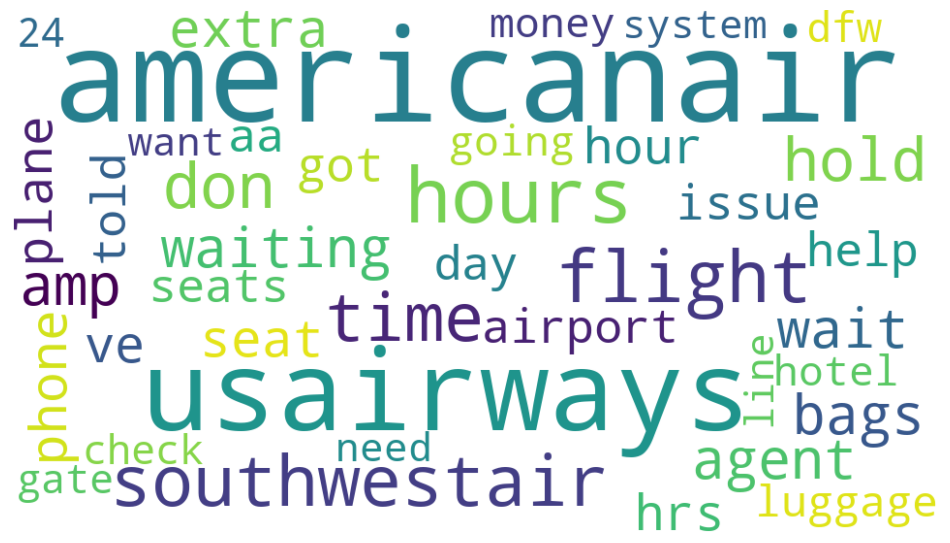

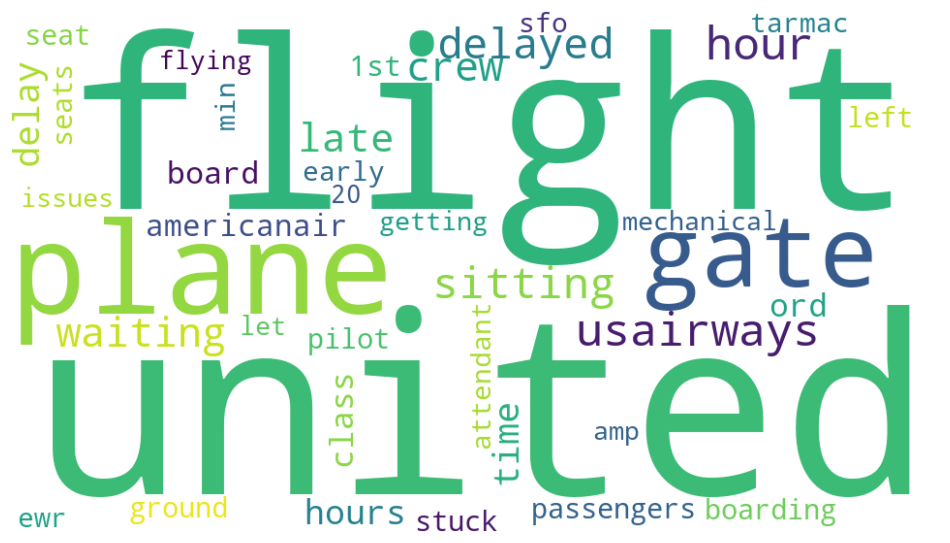

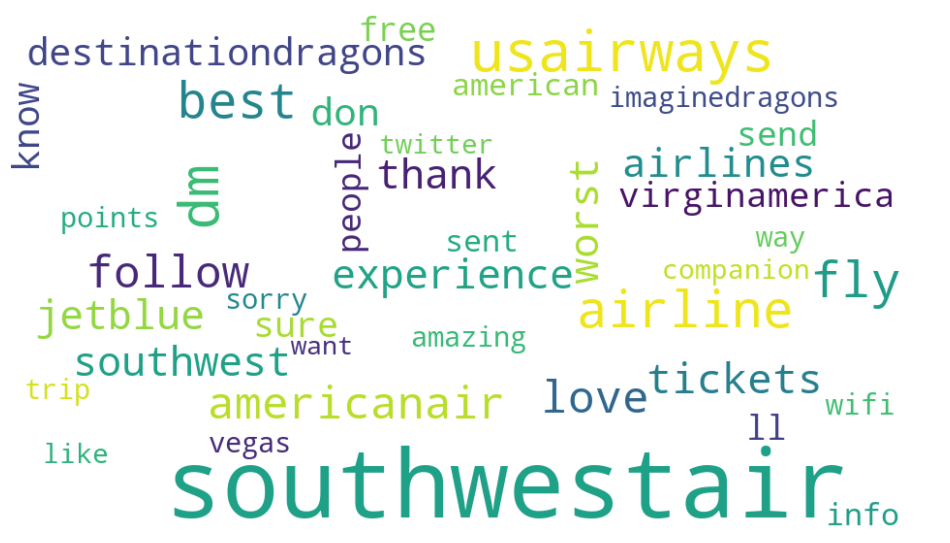

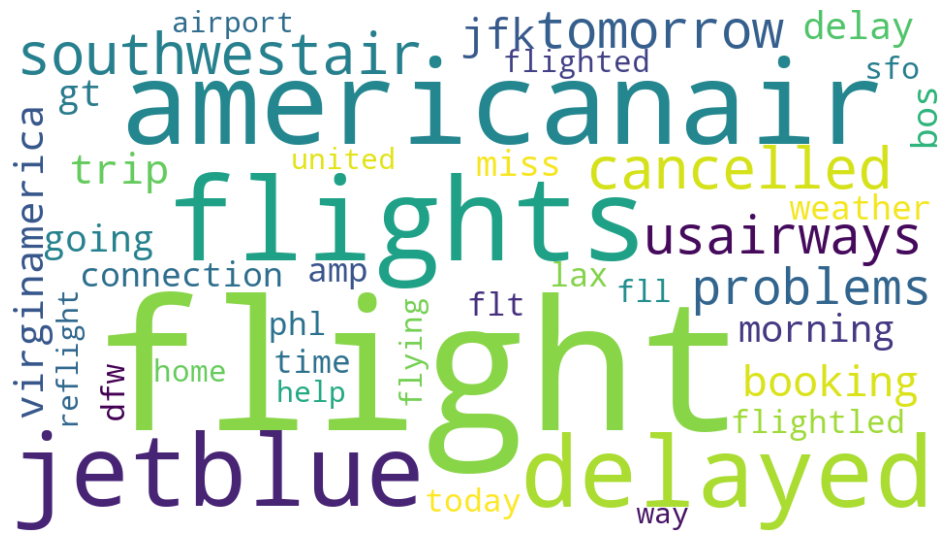

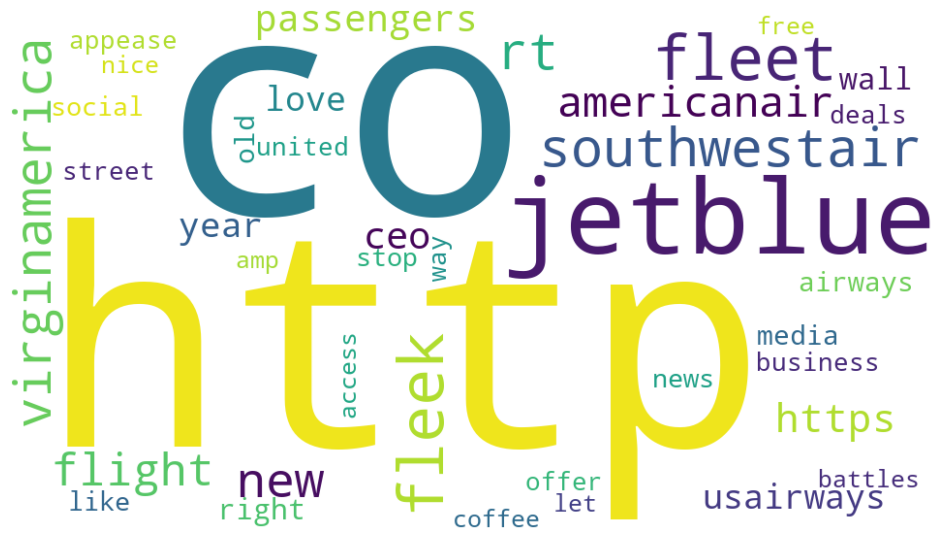

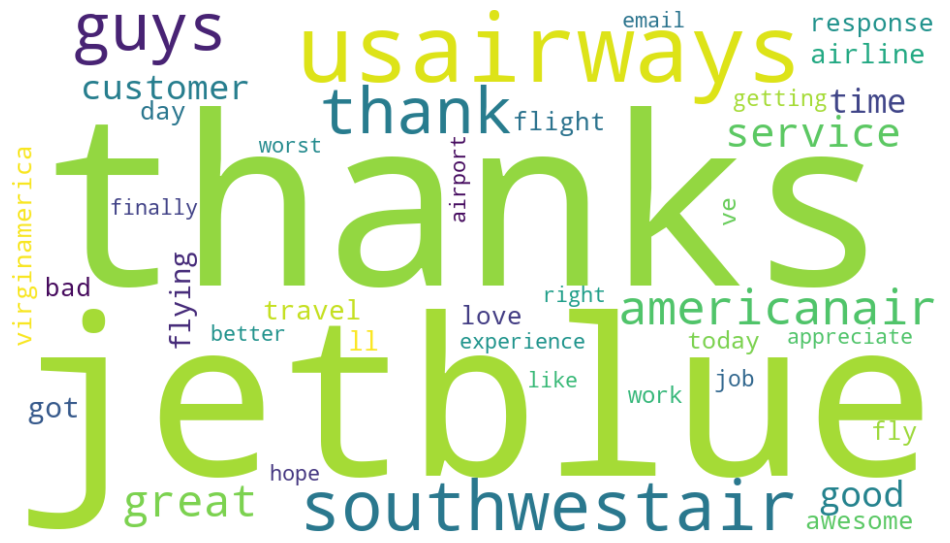

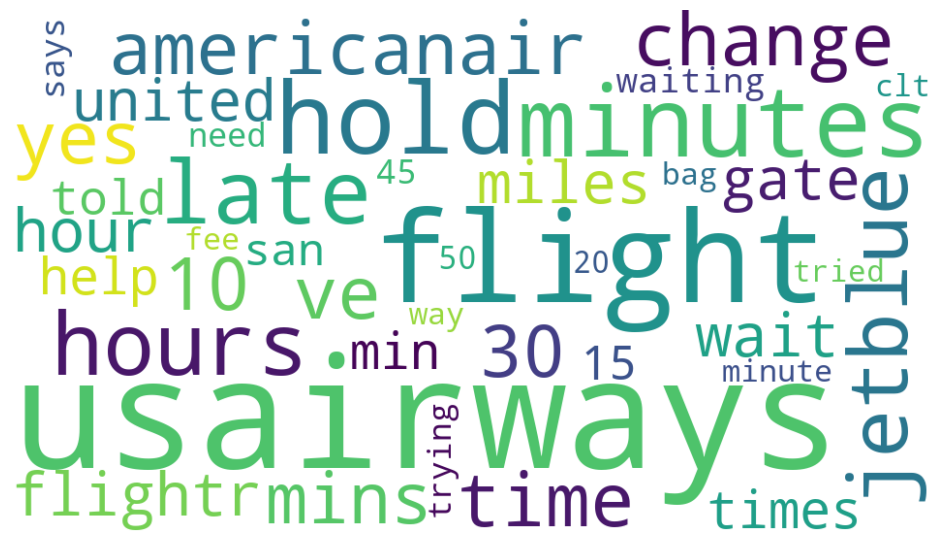

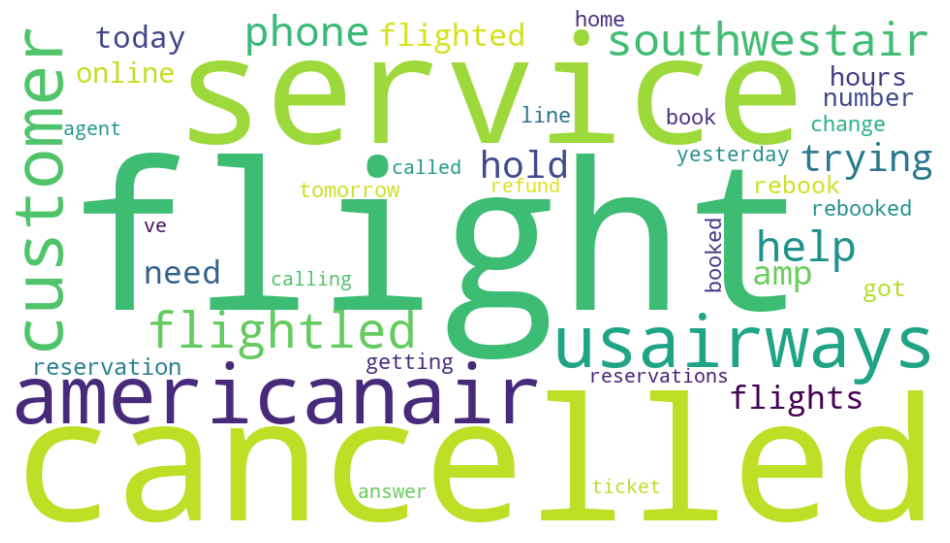

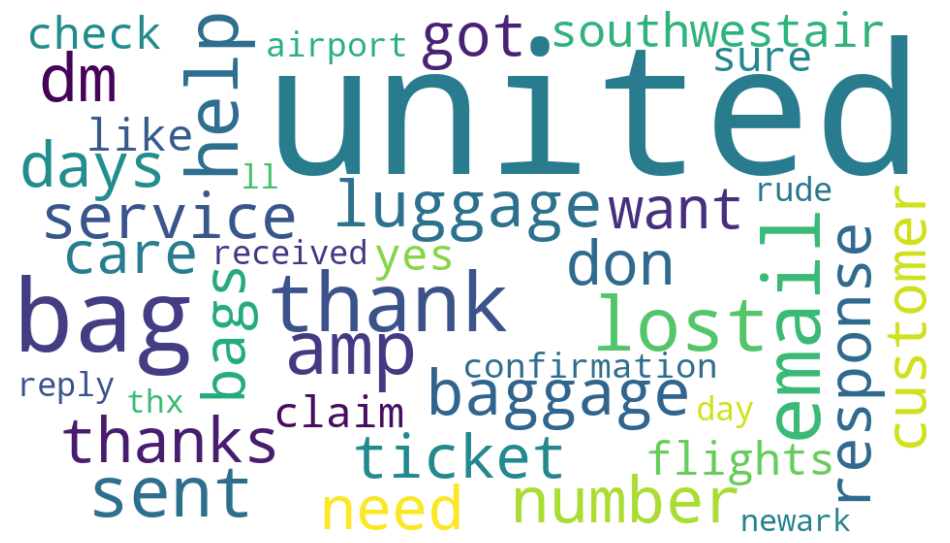

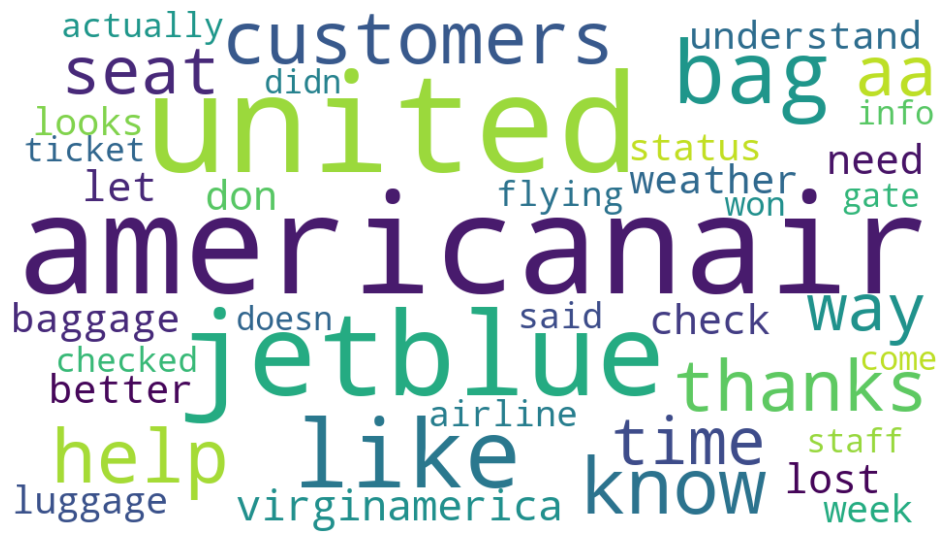

In [43]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())


## Topics names by joining the top 2 words:

In [47]:
topic_names = []
voc = count_para_vectorizer.get_feature_names_out()

print("Vocabulary:", voc)

for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

print("Topic Names:", topic_names)


Vocabulary: ['00' '000' '00pm' ... 'zero' 'zone' 'zurich']
Topic Names: ['Topic flight late', 'Topic co http', 'Topic united thanks', 'Topic jetblue thanks', 'Topic southwestair thanks', 'Topic americanair thanks', 'Topic thank great', 'Topic usairways hold', 'Topic service customer', 'Topic cancelled flightled']


## Separate data by tweet_created

In [50]:
import pandas as pd
from tqdm.auto import tqdm
import numpy as np

# Assuming you have the NMF model and vectorizer defined
year_data = []

for tweet_created in tqdm(np.unique(paragraph_df["tweet_created"])):
    # Assuming you have the NMF model and vectorizer defined
    W_tweet_created = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["tweet_created"] == tweet_created)])
    year_data.append([tweet_created] + list(W_tweet_created.sum(axis=0) / W_tweet_created.sum() * 100.0))

# Convert the year_data list to a DataFrame
columns = ['tweet_created'] + [f'Topic_{i}' for i in range(W_tweet_created.shape[1])]
year_df = pd.DataFrame(year_data, columns=columns)

# Display the DataFrame
print(year_df)


C:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. P

  0%|          | 0/14247 [00:00<?, ?it/s]

                   tweet_created    Topic_0    Topic_1    Topic_2    Topic_3  \
0      2015-02-16 23:36:05 -0800   1.257045  67.147655   0.000000  31.595300   
1      2015-02-16 23:43:02 -0800   0.000000   0.000000   0.000000  97.169987   
2      2015-02-16 23:48:48 -0800   5.909231   0.481801  64.543513   0.000000   
3      2015-02-16 23:52:20 -0800  28.128239   0.000000  50.689092   1.609132   
4      2015-02-17 00:00:36 -0800   1.542678   0.000000   7.826562   6.223356   
...                          ...        ...        ...        ...        ...   
14242  2015-02-24 11:48:29 -0800   2.835867   0.000000   6.423110  76.624989   
14243  2015-02-24 11:48:37 -0800   0.000000   0.000000   5.857070   0.000000   
14244  2015-02-24 11:48:38 -0800   1.347496  64.724431   0.711351  31.583349   
14245  2015-02-24 11:51:48 -0800   0.000000   0.000000   0.000000   0.000000   
14246  2015-02-24 11:53:37 -0800  23.505026   0.000000   0.000000   0.343829   

         Topic_4   Topic_5   Topic_6   

C:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. P

  0%|          | 0/14247 [00:00<?, ?it/s]

                           Topic flight late  Topic co http  \
tweet_created                                                 
2015-02-16 23:36:05 -0800           1.257045      67.147655   
2015-02-16 23:43:02 -0800           0.000000       0.000000   
2015-02-16 23:48:48 -0800           5.909231       0.481801   
2015-02-16 23:52:20 -0800          28.128239       0.000000   
2015-02-17 00:00:36 -0800           1.542678       0.000000   
...                                      ...            ...   
2015-02-24 11:48:29 -0800           2.835867       0.000000   
2015-02-24 11:48:37 -0800           0.000000       0.000000   
2015-02-24 11:48:38 -0800           1.347496      64.724431   
2015-02-24 11:51:48 -0800           0.000000       0.000000   
2015-02-24 11:53:37 -0800          23.505026       0.000000   

                           Topic united thanks  Topic jetblue thanks  \
tweet_created                                                          
2015-02-16 23:36:05 -0800           

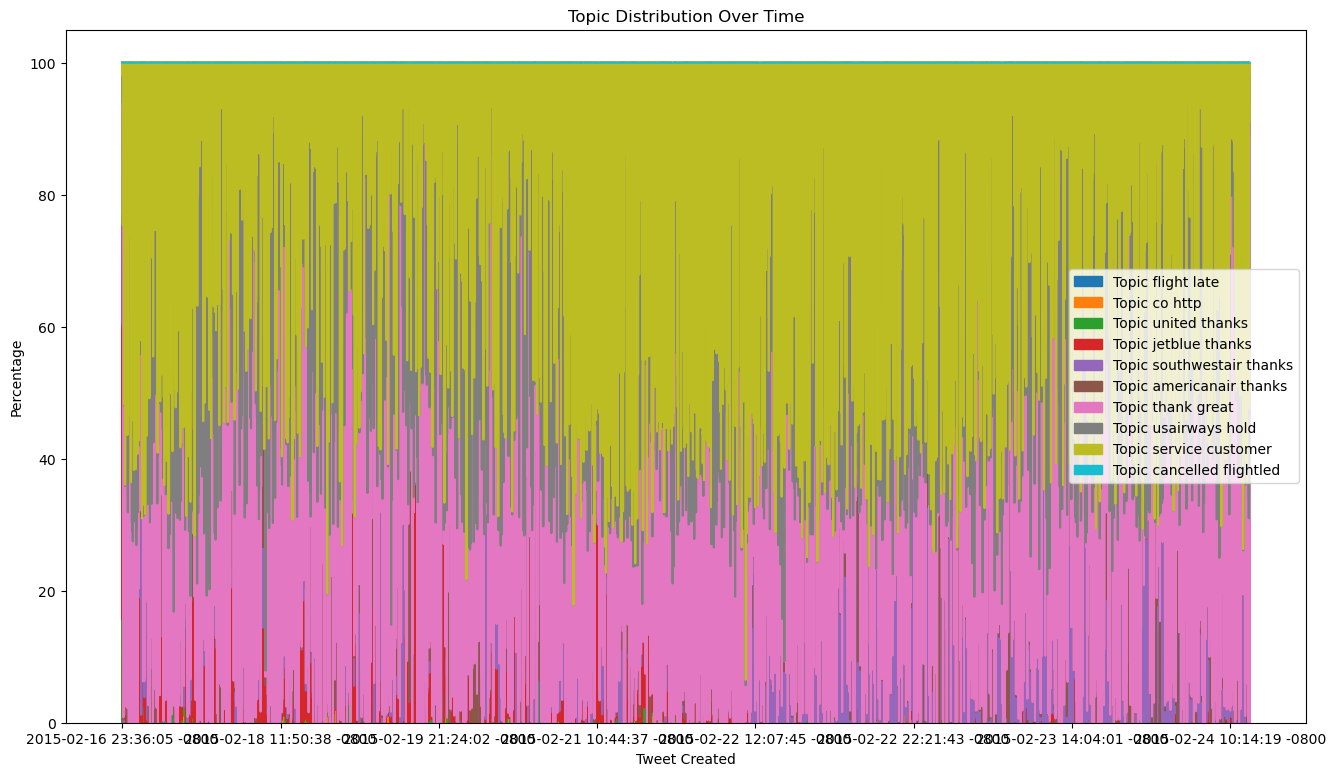

In [51]:
import matplotlib.pyplot as plt

# Assuming you have the NMF model and vectorizer defined
year_data = []

for tweet_created in tqdm(np.unique(paragraph_df["tweet_created"])):
    W_tweet_created = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["tweet_created"] == tweet_created)])
    year_data.append([tweet_created] + list(W_tweet_created.sum(axis=0) / W_tweet_created.sum() * 100.0))

# Convert the year_data list to a DataFrame
columns = ['tweet_created'] + topic_names  # Use the correct column names
df_year = pd.DataFrame(year_data, columns=columns).set_index("tweet_created")

# Display the DataFrame
print(df_year)

# Draw the time chart
df_year.plot.area(figsize=(16, 9))
plt.title('Topic Distribution Over Time')
plt.xlabel('Tweet Created')
plt.ylabel('Percentage')
plt.show()
